In [74]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
now = datetime.datetime.now()
import seaborn as sns
sns.set(color_codes=True)
from config import consumer_key,consumer_secret,access_token,access_token_secret
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import calendar
b=dict((v,k) for k,v in enumerate(calendar.month_abbr))


In [88]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts
target_user = ["@BBCWorld", "@CBS", "@CNN","@FoxNews","@nytimes"]



In [70]:
# Loop through each user
compound_list=[]
positive_list = []
negative_list = []
neutral_list = []
dates=[]
account=[]
texts=[]
for user in target_user:
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:
            account.append(user)
            texts.append(tweet['text'])
            dates.append(tweet['created_at'])

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]


            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)


In [87]:
e={'Compound Score':compound_list,'Positive Score':positive_list,'Negative Score':negative_list,'Neutral Score':neutral_list,'Time of Tweet':dates,'Author of Tweet':account,'Text':texts}
f=pd.DataFrame(e)
f.to_csv('output.csv', sep=',')
f

,Author of Tweet,Compound Score,Negative Score,Neutral Score,Positive Score,Text,Time of Tweet
0,@BBCWorld,0.0000,0.000,1.000,0.000,Can the ad industry persuade us to eat more ve...,Wed Mar 28 00:41:30 +0000 2018
1,@BBCWorld,0.2732,0.000,0.792,0.208,5 pop songs you didn't know were about God htt...,Wed Mar 28 00:33:33 +0000 2018
2,@BBCWorld,0.4404,0.000,0.804,0.196,Kim Jong-un's Beijing visit is considered a si...,Wed Mar 28 00:16:30 +0000 2018
3,@BBCWorld,0.5859,0.000,0.817,0.183,@BBCBreaking North Korea's leader Kim Jong-un ...,Wed Mar 28 00:04:15 +0000 2018
4,@BBCWorld,0.0000,0.000,1.000,0.000,China confirms Kim Jong-un visit https://t.co/...,Tue Mar 27 23:50:38 +0000 2018
5,@BBCWorld,-0.7841,0.463,0.537,0.000,Fired Vancouver waiter case: Are the French re...,Tue Mar 27 23:50:38 +0000 2018
6,@BBCWorld,0.5095,0.000,0.798,0.202,RT @BBCDanielS: BBC Exclusive interview with S...,Tue Mar 27 21:37:00 +0000 2018
7,@BBCWorld,0.0000,0.000,1.000,0.000,This 'smoking' elephant in India is baffling e...,Tue Mar 27 21:20:33 +0000 2018
8,@BBCWorld,-0.2516,0.229,0.603,0.168,Spy poisoning: 'I would really like to know ho...,Tue Mar 27 20:14:24 +0000 2018
9,@BBCWorld,0.0000,0.000,1.000,0.000,Brazilian sports reporters tackle on-air gropi...,Tue Mar 27 19:19:12 +0000 2018


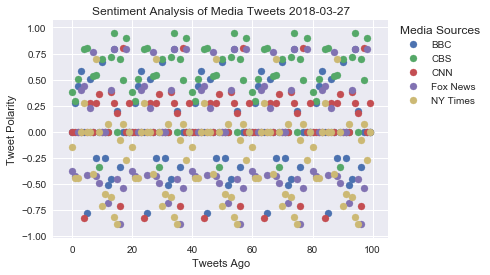

In [89]:
xval=[i for i in range(100)]
for i in target_user:
    plt.scatter(xval,f.groupby('Author of Tweet').get_group(i)['Compound Score'])
plt.legend(labels,bbox_to_anchor=(.3, 0, 1., 1.02),title='Media Sources')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets '+ now.strftime("%Y-%m-%d"))
plt.show()

In [96]:
#Averages
averages=f.groupby('Author of Tweet')['Compound Score'].mean()
strings=[]
for i in averages:
    strings.append('{0:.2f}'.format(i))
abovezero=[]
for i in averages:
    if i>0:
        abovezero.append('g')
    else:
        abovezero.append('r')

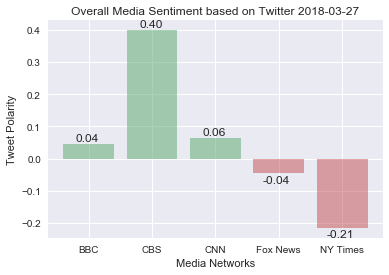

In [97]:
#Tumor Change Graph
x_axis = np.arange(len(averages))
plt.bar(x_axis,averages, color=abovezero, align="edge",alpha=.5)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, labels)
plt.xlabel('Media Networks')
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Twitter '+ now.strftime("%Y-%m-%d"))
for i in range(len(averages)):
    if averages[i]>0:
        plt.text(x=x_axis[i]+.2,y=averages[i]+.01,s=strings[i])
    else:
        plt.text(x=x_axis[i]+.15,y=averages[i]-.03,s=strings[i])
plt.show()